In [1]:
import numpy as np
import pandas as pd
import scanpy as sc # v1.6",
import sys
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path
import anndata
import seaborn as sns
import matplotlib as mpl
import scirpy as ir
import scanpy.external as sce

In [3]:
ir.__version__

'0.10.0'

In [3]:
os.chdir('/home/jovyan/data/GCA/GCA_raw_unfiltered')

path=[]
for filename in os.listdir('.'):  
    if os.path.isdir(filename):
        if filename != "cache":
            a = "./" + filename
            path.append(a)

path = [x for x in path if "ipynb_checkpoints" not in x]

In [4]:
path

['./GCA100_T1',
 './GCA92_B',
 './GCA102_B2',
 './GCA102_B1',
 './GCA55_1',
 './GCA47_2',
 './GCA47_3',
 './GCA86_B',
 './GCA54_3',
 './GCA70_2',
 './GCA70_3',
 './GCA100_B3',
 './GCA92_T',
 './GCA101_B1',
 './GCA101_T1',
 './GCA101_B3',
 './GCA101_T2',
 './GCA47_1',
 './GCA86_T',
 './GCA54_4',
 './GCA100_B1',
 './GCA100_T2',
 './GCA54_2',
 './GCA70_4',
 './GCA55_4',
 './GCA101_B2',
 './GCA54_1',
 './GCA55_3',
 './GCA102_B3',
 './GCA47_4',
 './GCA55_2',
 './GCA100_B2',
 './GCA70_1']

In [11]:
os.chdir('/home/jovyan/data/GCA/GCA_raw_unfiltered')
adata_temp = sc.read_10x_mtx(path[0], cache=True, var_names='gene_symbols', gex_only = True)
adata_temp.obs.index = adata_temp.obs.index.str[:-2]
adata_temp.obs.index = adata_temp.obs.index + '-' + (path[0].split('/')[1])
adata_temp.obs['sample_id'] = (path[0].split('/')[1])
adata_temp.obs['patient_id'] = (path[0].split('/')[1]).split('_')[0]
os.chdir('/home/jovyan/data/GCA/VDJ/airr_rearrangements')
tcr_temp = ir.io.read_10x_vdj('./' + path[0].split('/')[1].split('_')[0] + '_VDJ_' + path[0].split('/')[1].split('_')[1] + '_out/outs/filtered_contig_annotations.csv')
tcr_temp.obs.index = tcr_temp.obs.index.str[:-2]
tcr_temp.obs.index = tcr_temp.obs.index + '-' + (path[0].split('/')[1])
ir.pp.merge_with_ir(adata_temp, tcr_temp)
full = adata_temp[adata_temp.obs.has_ir == 'True',:]

... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical


In [12]:
for i in range(1, len(path)):
    if i == 'GCA47_4':
        continue
    os.chdir('/home/jovyan/data/GCA/GCA_raw_unfiltered')
    adata_temp = sc.read_10x_mtx(path[i], cache=True, var_names='gene_symbols', gex_only = True)
    adata_temp.obs.index = adata_temp.obs.index.str[:-2]
    adata_temp.obs.index = adata_temp.obs.index + '-' + (path[i].split('/')[1])
    adata_temp.obs['sample_id'] = (path[i].split('/')[1])
    adata_temp.obs['patient_id'] = (path[i].split('/')[1]).split('_')[0]
    os.chdir('/home/jovyan/data/GCA/VDJ/airr_rearrangements')
    tcr_temp = ir.io.read_10x_vdj('./' + path[i].split('/')[1].split('_')[0] + '_VDJ_' + path[i].split('/')[1].split('_')[1] + '_out/outs/filtered_contig_annotations.csv')
    tcr_temp.obs.index = tcr_temp.obs.index.str[:-2]
    tcr_temp.obs.index = tcr_temp.obs.index + '-' + (path[i].split('/')[1])
    ir.pp.merge_with_ir(adata_temp, tcr_temp)
    adata_temp = adata_temp[adata_temp.obs.has_ir == 'True',:]
    full = full.concatenate(adata_temp, index_unique=None)

... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'feature_types' as categorical
... storing 'sample_id' 

In [13]:
full

AnnData object with n_obs × n_vars = 50285 × 33538
    obs: 'sample_id', 'patient_id', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 

In [14]:
os.chdir('/home/jovyan/data/GCA/datasets')
full.write('TCR_object_raw_v6.h5ad')

... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'multi_chain' as categorical
... storing 'extra_chains' as categorical
... storing 'IR_VJ_2_c_call' as categorical
... storing 'IR_VDJ_2_c_call' as categorical
... storing 'IR_VDJ_1_d_call' as categorical
... storing 'IR_VDJ_2_d_call' as categorical
... storing 'IR_VJ_1_j_call' as categorical
... storing 'IR_VJ_2_j_call' as categorical
... storing 'IR_VDJ_1_j_call' as categorical
... storing 'IR_VDJ_2_j_call' as categorical
... storing 'IR_VJ_1_junction' as categorical
... storing 'IR_VJ_2_junction' as categorical
... storing 'IR_VDJ_1_junction' as categorical
... storing 'IR_VDJ_2_junction' as categorical
... storing 'IR_VJ_1_junction_aa' as categorical
... storing 'IR_VJ_2_junction_aa' as categorical
... storing 'IR_VDJ_1_junction_aa' as categorical
... storing 'IR_VDJ_2_junction_aa' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storin



***Append metadata***



In [22]:
os.chdir('/home/jovyan/data/GCA/datasets')
full = sc.read_h5ad('TCR_object_raw_v6.h5ad')

In [25]:
os.chdir('/home/jovyan/data/GCA/stats/')
anno = pd.read_csv('initial_clustering_stats.csv', index_col = 0)
anno.index = anno.index.str.replace('GCA54_T1','GCA54_1')
anno.index = anno.index.str.replace('GCA54_T2','GCA54_2')
anno.index = anno.index.str.replace('GCA54_B1','GCA54_3')
anno.index = anno.index.str.replace('GCA54_B2','GCA54_4')
anno.index = anno.index.str.replace('GCA55_T1','GCA55_1')
anno.index = anno.index.str.replace('GCA55_T2','GCA55_2')
anno.index = anno.index.str.replace('GCA55_B1','GCA55_3')
anno.index = anno.index.str.replace('GCA55_B2','GCA55_4')
anno.index = anno.index.str.replace('GCA70_T1','GCA70_1')
anno.index = anno.index.str.replace('GCA70_T2','GCA70_2')
anno.index = anno.index.str.replace('GCA70_B1','GCA70_3')
anno.index = anno.index.str.replace('GCA70_B2','GCA70_4')
anno.index = anno.index.str.replace('GCA47_T1','GCA47_1')
anno.index = anno.index.str.replace('GCA47_T2','GCA47_2')
anno.index = anno.index.str.replace('GCA47_B1','GCA47_3')
anno.index = anno.index.str.replace('GCA47_B2','GCA47_4')

anno['cell'] = anno.index
anno[['cell', 'sample_id']] = anno['cell'].str.split('-', 1, expand = True)

anno.drop(columns = ['cell'], inplace = True)

full.obs = full.obs.merge(anno[['anno', 'tissue', 'diagnosis']], how = 'left', left_index = True, right_index = True)


In [40]:
full.obs.loc[full.obs.sample_id == 'GCA54_1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA54_2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA54_3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA54_4', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA55_1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA55_2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA55_3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA55_4', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA70_1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA70_2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA70_3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA70_4', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA47_1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA47_2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA47_3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA47_4', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA100_B1', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA100_B2', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA100_B3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA100_T1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA100_T2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA101_B1', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA101_B2', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA101_B3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA101_T1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA101_T2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA102_B1', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA102_B2', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA102_B3', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA102_T1', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA102_T2', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA92_B', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA92_T', 'tissue'] = 'tissue'
full.obs.loc[full.obs.sample_id == 'GCA86_B', 'tissue'] = 'blood'
full.obs.loc[full.obs.sample_id == 'GCA86_T', 'tissue'] = 'tissue'


In [41]:
full.obs.loc[full.obs.sample_id == 'GCA54_1', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA54_2', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA54_3', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA54_4', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA55_1', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA55_2', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA55_3', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA55_4', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA70_1', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA70_2', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA70_3', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA70_4', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA47_1', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA47_2', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA47_3', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA47_4', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA100_B1', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA100_B2', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA100_B3', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA100_T1', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA100_T2', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA101_B1', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA101_B2', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA101_B3', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA101_T1', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA101_T2', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA102_B1', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA102_B2', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA102_B3', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA102_T1', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA102_T2', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA92_B', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA92_T', 'diagnosis'] = 'negative'
full.obs.loc[full.obs.sample_id == 'GCA86_B', 'diagnosis'] = 'positive'
full.obs.loc[full.obs.sample_id == 'GCA86_T', 'diagnosis'] = 'positive'

In [34]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full.write('TCR_object_annotated_v6.h5ad', compression = 'gzip')



***Restart***



In [3]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full = sc.read_h5ad('TCR_object_annotated_v6.h5ad')

In [18]:
full.obs.groupby(['patient_id', 'tissue']).size()

patient_id  tissue
GCA47       blood      4281
            tissue      637
GCA54       blood        26
            tissue      496
GCA55       blood      5930
            tissue     8925
GCA70       blood       238
            tissue      462
GCA86       blood      1488
            tissue       38
GCA92       blood       367
            tissue      156
GCA100      blood      4400
            tissue       20
GCA101      blood     11053
            tissue       21
GCA102      blood     11734
            tissue        0
dtype: int64

In [12]:
ir.io.upgrade_schema(full)

... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'anno' as categorical
... storing 'tissue' as categorical
... storing 'diagnosis' as categorical


In [17]:
ir.tl.chain_qc(full)

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


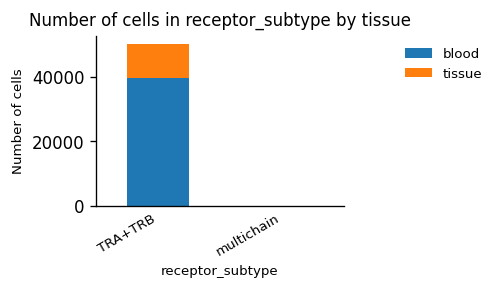

In [18]:
ax = ir.pl.group_abundance(full, groupby="receptor_subtype", target_col="tissue")

In [19]:
full = full[full.obs["chain_pairing"] != "multichain", :].copy()

In [20]:
full = full[~full.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()

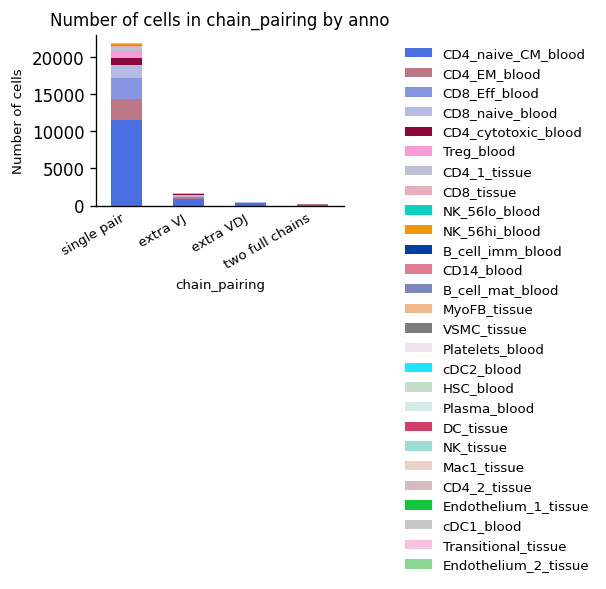

In [21]:
ax = ir.pl.group_abundance(full, groupby="chain_pairing", target_col="anno")

In [22]:
full = full[full.obs["chain_pairing"] != "multichain", :].copy()
full = full[~full.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()

In [23]:
ir.pp.ir_dist(full)
ir.tl.define_clonotypes(full, receptor_arms="all", dual_ir="primary_only")

  0%|          | 0/28113 [00:00<?, ?it/s]

In [24]:
ir.pp.ir_dist(
    full,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

  0%|          | 0/150975 [00:00<?, ?it/s]

  0%|          | 0/165025 [00:00<?, ?it/s]

In [25]:
ir.tl.define_clonotype_clusters(
    full, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

  0%|          | 0/28262 [00:00<?, ?it/s]

In [26]:
ir.tl.clonotype_network(full, min_cells=2)



... storing 'clone_id' as categorical
... storing 'cc_aa_alignment' as categorical


<AxesSubplot:>

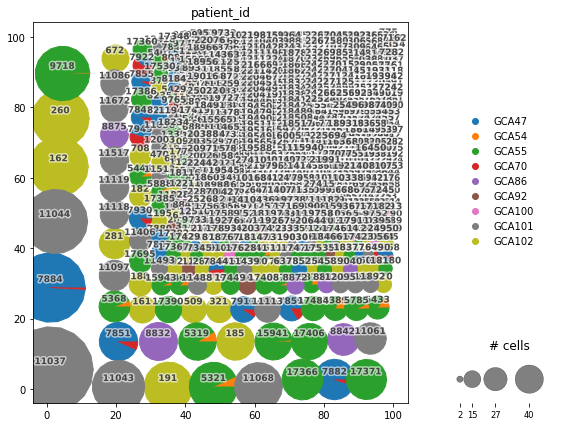

In [27]:
ir.pl.clonotype_network(
    full, color="patient_id", label_fontsize=9, panel_size=(7, 7), base_size=20
)

<AxesSubplot:>

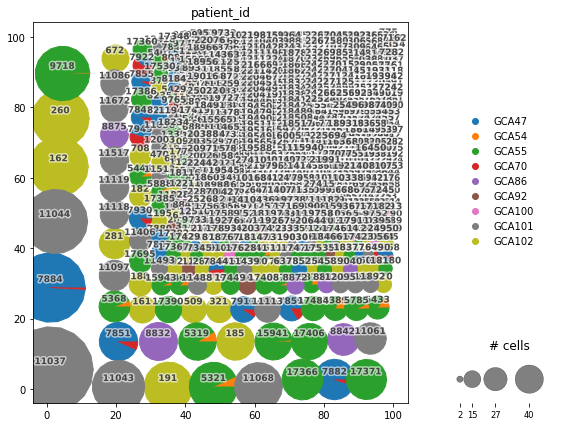

In [28]:
ir.pl.clonotype_network(
    full, color="patient_id", label_fontsize=9, panel_size=(7, 7), base_size=20
)



In [29]:
os.chdir('/home/jovyan/data/GCA/stats/')
anno = pd.read_csv('initial_clustering_stats.csv', index_col = 0)
anno['cell'] = anno.index
anno[['cell', 'sample_id']] = anno['cell'].str.split('-', 1, expand = True)

anno.drop(columns = ['cell'], inplace = True)

full.obs = full.obs.merge(anno[['diagnosis']], how = 'left', left_index = True, right_index = True)

In [37]:
full.obs['diagnosis'] = full.obs.diagnosis_x
del full.obs['diagnosis_y']
del full.obs['diagnosis_x']

In [38]:
full.obs.groupby(['diagnosis']).size()

diagnosis
negative    17087
positive    16891
dtype: int64

In [42]:
full.obs['combined_1'] = full.obs.diagnosis.astype(str) + '_' + full.obs.anno.astype(str) + '_' + full.obs.patient_id.astype(str)
full.obs['combined_2'] = full.obs.diagnosis.astype(str) + '_' + full.obs.anno.astype(str)



temp = full[full.obs.anno.isin(['CD4_naive_CM_blood', 'CD8_Eff_blood', 'CD4_EM_blood', 'CD8_naive_blood', 'CD4_cytotoxic_blood', 'Treg_blood', 'CD4_1_tissue', 'CD8_tissue', 'CD4_2_tissue']),:]

ir.tl.alpha_diversity(temp, groupby = 'combined_1', target_col='clone_id')


os.chdir('/home/jovyan/data/GCA/stats/')
temp.obs[['combined_1', 'combined_2', 'normalized_shannon_entropy_clone_id', 'anno', 'patient_id', 'diagnosis']].to_csv('TCR_shannon_v6.csv')

Trying to set attribute `.obs` of view, copying.


In [41]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full.write('TCR_object_v6.h5ad', compression = 'gzip')

... storing 'combined_1' as categorical
... storing 'combined_2' as categorical




***Restart***



In [3]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full = sc.read_h5ad('TCR_object_v6.h5ad')

In [44]:
df, dst, lk = ir.tl.repertoire_overlap(full, "patient_id", inplace=False)

In [45]:
full.obs['clonal'] = 'unknown'

full.obs.loc[full.obs.clone_id_size > 1, 'clonal'] = 'clonal'
full.obs.loc[full.obs.clone_id_size == 1, 'clonal'] = 'non_clonal'

Trying to set attribute `.uns` of view, copying.


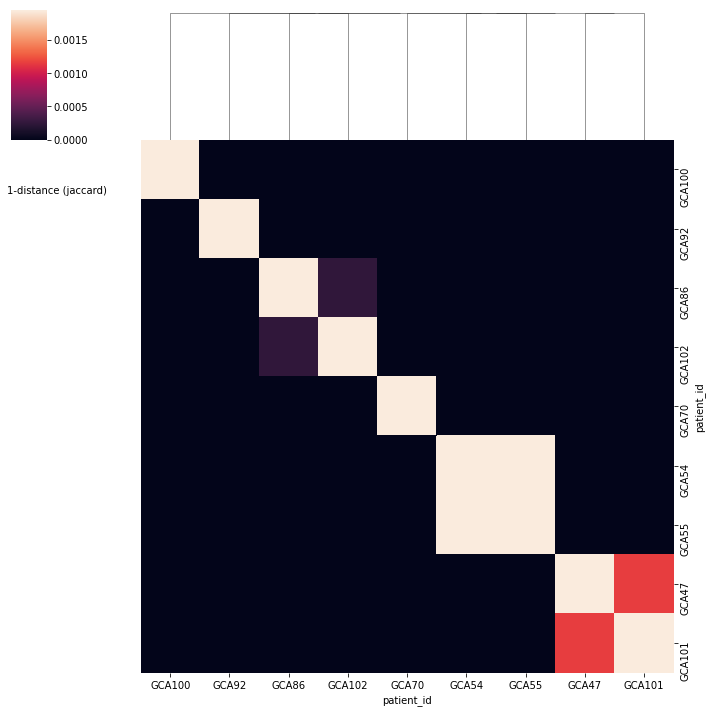

In [46]:
os.chdir('/home/jovyan/data/GCA/figures/')
blood = full[full.obs.tissue == 'blood',:]
ir.pl.repertoire_overlap(blood, "patient_id")
plt.savefig('blood_repertoire_overlap_v6.png')

In [47]:
#export to R for clonality overlap analysis

os.chdir('/home/jovyan/data/GCA/TCR_analysis')
full.obs.to_csv('TCR_summary_data_v6.csv')

Trying to set attribute `.uns` of view, copying.


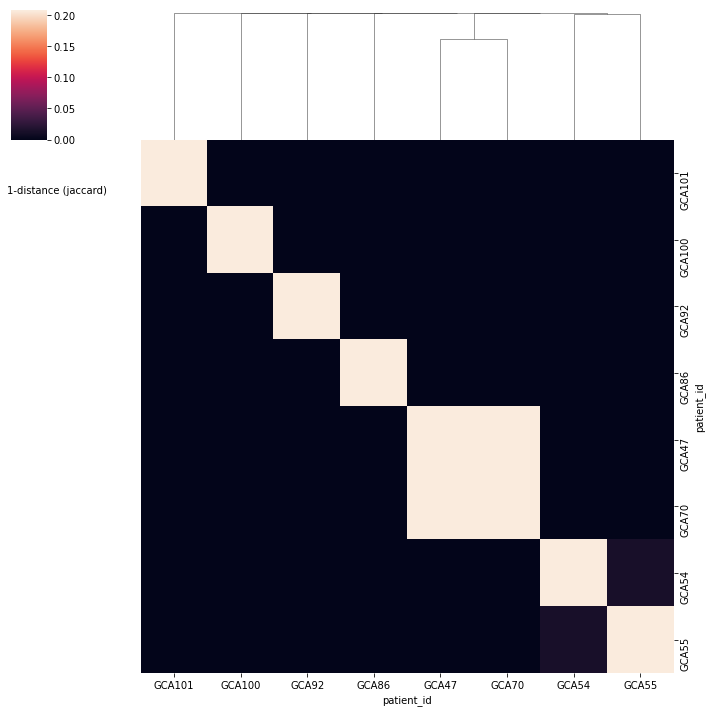

In [48]:
os.chdir('/home/jovyan/data/GCA/figures/')
tissue = full[full.obs.tissue == 'tissue',:]
ir.pl.repertoire_overlap(tissue, "patient_id")
plt.savefig('tissue_repertoire_overlap_v6.png')

<AxesSubplot:>

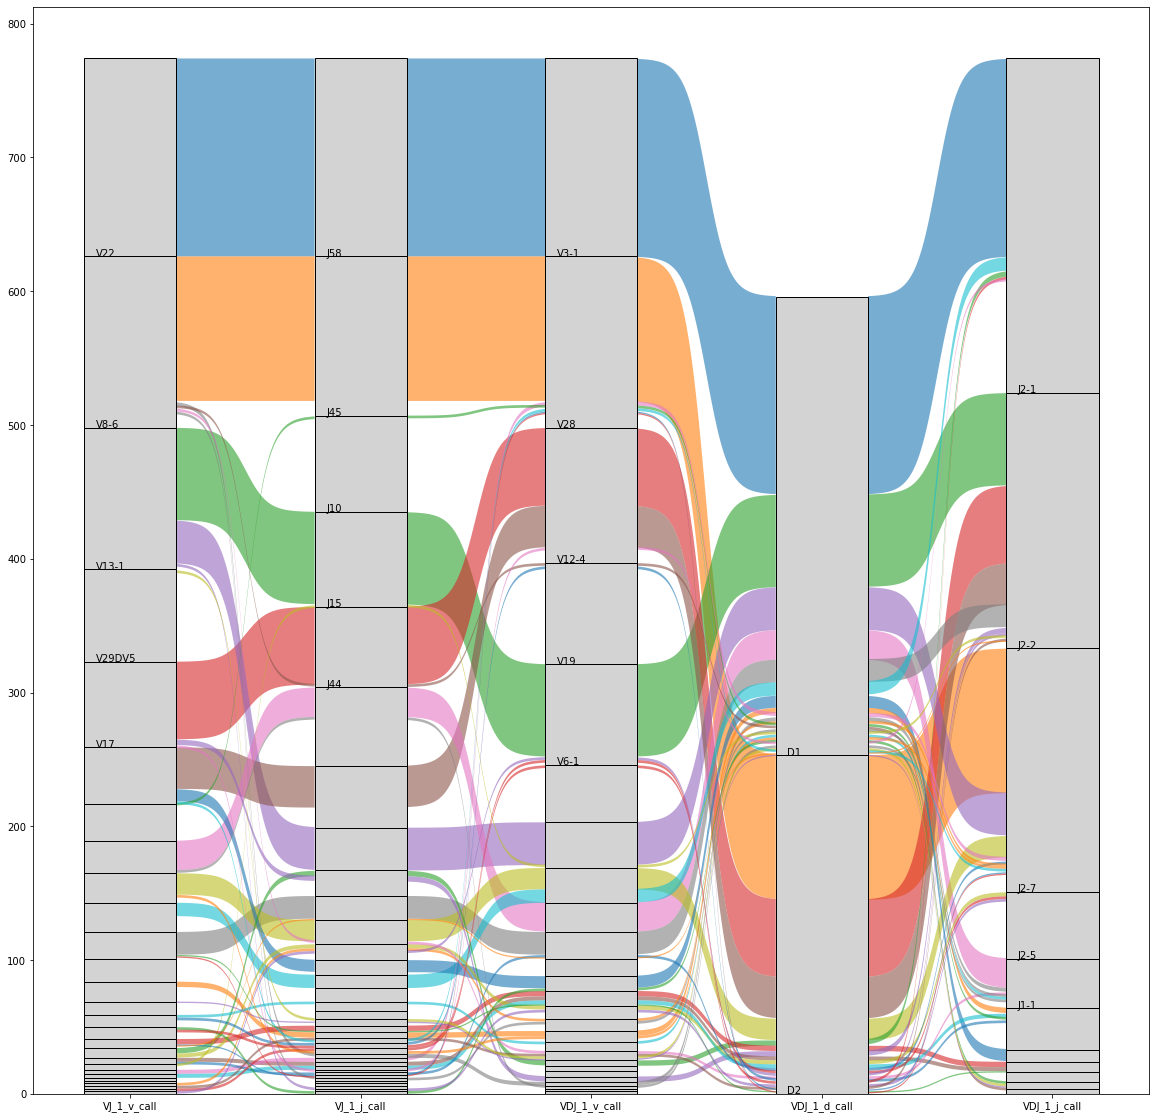

In [81]:
ir.pl.vdj_usage(
    full[full.obs["clone_id"].isin(["3360", 	"3362", 	"3377", 	"3383", 	"3389", 	"3405", 	"3407", 	"3422", 	"3429", 	"3441", 	"3460", 	"3465", 	"3469", 	"3517", 	"3560", 	"3577", 	"3609", 	"3611", 	"3629", 	"3741", 	"3802", 	"3816", 	"3898", 	"3915", 	"4303", 	"4392", 	"4475", 	"4503", 	"4730", 	"4808", 	"4949", 	"4967", 	"5385", 	"5415", 	"5696", 	"5746", 	"5870", 	"5876", 	"7588", 	"12906", 	"12911", 	"12912", 	"12915", 	"14023", 	"14041", 	"14042", 	"14069", 	"14073", 	"14079", 	"14125", 	"14126", 	"14128", 	"14135", 	"14139", 	"14157", 	"16969", 	"16994", 	"17007", 	"17012", 	"17042", 	"17074"]), :],
    max_ribbons=None,
    max_segments=100,  fig_kws={"figsize": (20,20)}
)



***Export data to plot clonality by celltype***



In [59]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full = sc.read_h5ad('TCR_object_v6.h5ad')

In [111]:
full.obs.groupby(['patient_id', 'tissue']).size()

patient_id  tissue
GCA47       blood     2158
            tissue     351
GCA54       blood       16
            tissue     353
GCA55       blood     3940
            tissue    5357
GCA70       blood      198
            tissue     189
GCA86       blood     1157
            tissue      24
GCA92       blood      191
            tissue      84
GCA100      blood     3519
            tissue      16
GCA101      blood     7749
            tissue       7
GCA102      blood     8669
            tissue       0
dtype: int64

In [113]:
full.obs['clonal'] = full.obs.duplicated(['clone_id'], keep=False)

In [118]:
temp = full[full.obs.anno.isin(['CD4_1_tissue', 'CD4_2_tissue', 'CD4_EM_blood', 'CD4_cytotoxic_blood', 'CD4_naive_CM_blood', 
                                'CD8_Eff_blood', 'CD8_naive_blood', 'CD8_tissue'])]

os.chdir('/home/jovyan/data/GCA/TCR_analysis/')
temp.obs.groupby(['anno', 'clonal']).size().to_csv('clonality_by_celltype.csv')



***Distance matrix***



In [24]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full = sc.read_h5ad('TCR_object_v6.h5ad')



In [25]:
#add consensus annotation to the data

os.chdir('/home/jovyan/data/GCA/TCR_analysis/')
consensus_anno = pd.read_csv('consensus_annotation.csv', index_col = 0)
full.obs.clone_id = full.obs['clone_id'].astype(str)
consensus_anno.clone_id = consensus_anno['clone_id'].astype(str)
full.obs['cell'] = full.obs.index
temp = full.obs.merge(consensus_anno, how = 'left', on = 'clone_id')
temp.index = full.obs.cell
full.obs = temp

In [26]:
#add an annotation for clonality and consensus annotation
full.obs['clonal'] = full.obs.duplicated(['clone_id'], keep=False)
full.obs['combined'] = full.obs.consensus.astype(str) + '_' + full.obs.clonal.astype(str)

In [27]:
#separate out tissue CD8 T cells and make a Hamming distance matrix

#cd8 = full[full.obs.consensus.isin(['CD8_Eff_blood', 'CD8_naive_blood', 'CD8_tissue']),:]
cd8 = full[full.obs.consensus.isin(['CD8_tissue']),:]

In [28]:
temp = cd8.obs[['IR_VDJ_1_junction_aa', 'combined']].drop_duplicates()

In [29]:
#need to annotate the data to add a row names key

temp[['cell', 'tissue', 'clonal']] = temp['combined'].str.split('_', expand = True)
temp['cell'] = temp.index
temp[['barcode', 'donor']] = temp['cell'].str.split('-', expand = True)
temp[['donor', 'spare']] = temp['donor'].str.split('_', expand = True)



In [30]:
temp.donor = temp.donor.astype('category')
temp.donor.cat.categories

Index(['GCA101', 'GCA47', 'GCA54', 'GCA55', 'GCA70', 'GCA86', 'GCA92'], dtype='object')

In [31]:
di = {'GCA47': "positive", 'GCA54': 'positive', 'GCA55': 'positive', 'GCA70': 'negative', 'GCA86': 'positive', 'GCA92': 'negative', 'GCA101': 'negative'}
temp = temp.replace({"donor": di})

In [32]:
#map colors to categories

clonal = temp.pop('clonal')
lut = dict(zip(clonal.unique(), ['#DDDA52', '#A594BF']))
row_colors = clonal.map(lut)

donor = temp.pop('donor')
lut = dict(zip(donor.unique(), ['#DD5F5F', '#5CC1D2']))
row_colors2 = donor.map(lut)

In [47]:
dist = ir.ir_dist.sequence_dist(temp.IR_VDJ_1_junction_aa, metric='hamming', cutoff = None)
dist_cd8 = pd.DataFrame(dist.todense())

  0%|          | 0/10 [00:00<?, ?it/s]

In [48]:
row_colors.index = dist_cd8.index
row_colors2.index = dist_cd8.columns

/home/jovyan/my-conda-envs/GCA_py/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


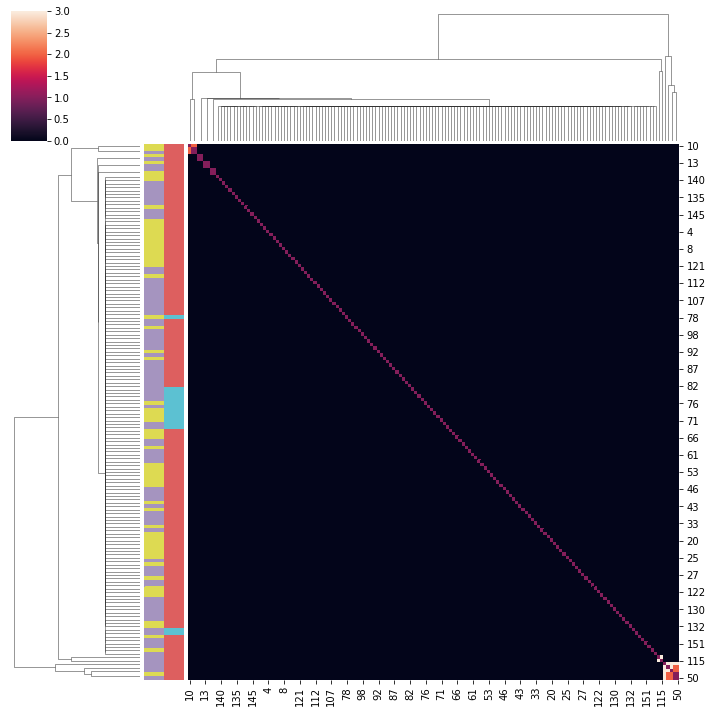

In [49]:
g = sns.clustermap(dist_cd8, row_colors=[row_colors, row_colors2])
plt.show()

os.chdir('/home/jovyan/data/GCA/figures/')
g.savefig('TCR_distances_CD8_tissue.png')



***DEGs of clone T cells***



In [70]:
os.chdir('/home/jovyan/data/GCA/datasets/')
full = sc.read_h5ad('TCR_object_v6.h5ad')

In [71]:
sc.pp.normalize_total(full, target_sum=1e4)
sc.pp.log1p(full)

In [72]:
full.obs['clonal'] = 'unknown'

full.obs.loc[full.obs.clone_id_size > 1, 'clonal'] = 'clonal'
full.obs.loc[full.obs.clone_id_size == 1, 'clonal'] = 'non_clonal'

In [73]:
tissue_CD8 = full[full.obs.anno == 'CD8_tissue',:]
sc.tl.rank_genes_groups(tissue_CD8, 'clonal', method='wilcoxon')


result = tissue_CD8.uns['rank_genes_groups']
groups = result['names'].dtype.names
stats_CD8 = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

/home/jovyan/my-conda-envs/GCA_py/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VJ_2_consensus_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VDJ_2_consensus_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VJ_2_duplicate_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VDJ_2_duplicate_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'clonal' as categorical


In [76]:
tissue_CD4 = full[full.obs.anno == 'CD4_1_tissue',:]
sc.tl.rank_genes_groups(tissue_CD4, 'clonal', method='wilcoxon')


result = tissue_CD4.uns['rank_genes_groups']
groups = result['names'].dtype.names
stats_CD4 = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

/home/jovyan/my-conda-envs/GCA_py/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VJ_2_consensus_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VDJ_2_consensus_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VJ_2_duplicate_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IR_VDJ_2_duplicate_count' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'clonal' as categorical


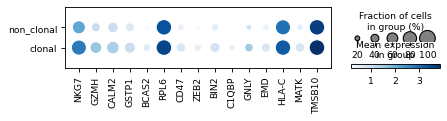

In [77]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, fontsize = 10)

os.chdir('/home/jovyan/data/GCA/figures/')

tissue_CD8.obs.clonal.cat.reorder_categories(['non_clonal', 'clonal'], inplace = True)

sc.pl.DotPlot(tissue_CD8, stats_CD8.head(15).clonal_n.tolist(), 
              figsize = [6,1],
              groupby = 'clonal').style(cmap='Blues', dot_edge_color='white', 
                                                    dot_edge_lw=1).savefig('markers_clonal_CD8.png')

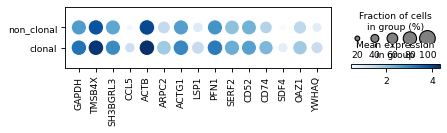

In [78]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, fontsize = 10)

os.chdir('/home/jovyan/data/GCA/figures/')

tissue_CD4.obs.clonal.cat.reorder_categories(['non_clonal', 'clonal'], inplace = True)

sc.pl.DotPlot(tissue_CD4, stats_CD4.head(15).clonal_n.tolist(), 
              figsize = [6,1],
              groupby = 'clonal').style(cmap='Blues', dot_edge_color='white', 
                                                    dot_edge_lw=1).savefig('markers_clonal_CD4.png')